# Effect of FDA's Calorie Count policy on Restaurant Industry Using NLP

The U.S. Food and Drug Administration (FDA) has announced to implement an Obama-era policy that will require restaurants with more than 20 locations to label calorie counts on their menus. This move by the FDA, gives people the opportunity to take calorie count into consideration when they order a meal.

This Project uses the Restaurants Menu-Item names and user food choice to see which food item becomes more preferable(low calories). The relation between user choice and Menu items is achieved using N-grams.

[Check out my blog for more info](https://medium.com/@hramachandran/analysis-of-fdas-calorie-count-policy-effects-on-restaurant-food-items-using-nlp-ee80ca4bff1d)

# Import Packages

In [1]:
import pandas as pd
import nltk
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
from random import shuffle

import random
import plotly
plotly.tools.set_credentials_file(username=your_name, api_key=your_api)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go

%matplotlib inline

# Data Exploration

#### Python has a data wrangling tool called Pandas!


Mainly helpful for quick visualization and statistics!



In [3]:
df_2017 = pd.read_csv('./data/Annual_Data_2017.csv', encoding = "ISO-8859-1")
df_2014 = pd.read_csv('./data/Annual_Data_2014.csv', encoding = "ISO-8859-1")

In [4]:
#Modify the dataframe

df_2017 = df_2017.rename(columns={'Calories_2017': 'Calories'})
df_2014 = df_2014.rename(columns={'Calories_2014': 'Calories'})

df_2014['year'] = '2014'
df_2017['year'] = '2017'

In [5]:

df_2017.sample(5)

,Menu_Item_ID,Restaurant,Food_Category,Item_Name_2017,Item_Description_2017,Serving_Size_2017,Serving_Size_text_2017,Serving_Size_Unit_2017,Serving_Size_household_2017,Calories,...,Potassium_text_2017,Carbohydrates_text_2017,Protein_text_2017,Sugar_text_2017,Dietary_Fiber_text_2017,Kids_Meal_2017,Limited_Time_Offer_2017,Regional_2017,Shareable_2017,year
28913,48223,Moe's Southwest Grill,Toppings & Ingredients,"Shredded Cheese, for Quesadillas","Shredded Cheese, for Quesadillas, Ingredients",NaN,NaN,NaN,NaN,220.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2017
30338,60680,Culver's,Beverages,"Diet Pepsi, Small","Diet Pepsi, Drinks, Small, Kids & Adults Menu;...",NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,2017
21445,18534,KFC,Beverages,"Tropicana Twister Orange, 16 fl oz","Tropicana Twister Orange, 16 fl oz, Beverages",16.0,NaN,fl oz,NaN,230.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2017
5140,129841,Papa John's,Desserts,Brookie,"Brookie, Desserts",41.0,NaN,g,1 Slice; 1/8 Order,190.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2017
5879,131755,Golden Corral,Toppings & Ingredients,Olive Oil,"Olive Oil, for Salad Buffet, Hot Buffet",15.0,NaN,g,1 Tbsp,120.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2017


In [6]:
print(df_2017.shape)
print(df_2017.columns)

(35099, 47)
Index(['Menu_Item_ID', 'Restaurant', 'Food_Category', ' Item_Name_2017',
       'Item_Description_2017', 'Serving_Size_2017', 'Serving_Size_text_2017',
       'Serving_Size_Unit_2017', 'Serving_Size_household_2017', 'Calories',
       'Total_Fat_2017', 'Saturated_Fat_2017', 'Trans_Fat_2017',
       'Cholesterol_2017', 'Sodium_2017', 'Potassium_2017',
       'Carbohydrates_2017', 'Protein_2017', 'Sugar_2017',
       'Dietary_Fiber_2017', 'Calories_100g_2017', 'Total_Fat_100g_2017',
       'Saturated_Fat_100g_2017', 'Trans_Fat_100g_2017',
       'Cholesterol_100g_2017', 'Sodium_100g_2017', 'Potassium_100g_2017',
       'Carbohydrates_100g_2017', 'Protein_100g_2017', 'Sugar_100g_2017',
       'Dietary_Fiber_100g_2017', 'Calories_text_2017', 'Total_Fat_text_2017',
       'Saturated_Fat_text_2017', 'Trans_Fat_text_2017',
       'Cholesterol_text_2017', 'Sodium_text_2017', 'Potassium_text_2017',
       'Carbohydrates_text_2017', 'Protein_text_2017', 'Sugar_text_2017',
       'Die

In [7]:
#What are the restaurants
df_2017['Restaurant'].unique()

array(['Qdoba', 'Quiznos', "Applebee's", 'Red Lobster', 'Red Robin',
       "Romano's Macaroni Grill", 'Round Table Pizza', 'Ruby Tuesday',
       'Sbarro', 'Sheetz', 'Sonic', 'Starbucks', 'Dairy Queen',
       "Steak 'N Shake", 'Subway', "TGI Friday's", 'Taco Bell',
       'Tim Hortons', "Arby's", 'Whataburger', 'Wawa', "Wendy's",
       'White Castle', 'Wingstop', 'Yard House', "Zaxby's",
       "Checker's Drive-In/Rallys", 'Baskin Robbins', "Carl's Jr.",
       'Del Taco', 'Einstein Bros', "Hardee's", 'Bob Evans',
       "Jason's Deli", 'Burger King', 'Boston Market',
       "BJ's Restaurant & Brewhouse", 'Chick-Fil-A', 'Krispy Kreme',
       "Church's Chicken", 'IHOP', "Long John Silver's", 'Bojangles',
       'El Pollo Loco', "Friendly's", 'KFC', 'Hooters', '7 Eleven',
       'Popeyes', 'Jamba Juice', "McDonald's", 'California Pizza Kitchen',
       "Dunkin' Donuts", "Culver's", 'Bonefish Grill', "Captain D's",
       "Carrabba's Italian Grill", 'The Capital Grille', 'Jack in the 

In [8]:
#How many restaurant are we dealing here?
len(set(df_2017['Restaurant']))

94

In [9]:
#What categories the dishes/menu item comes under?
df_2017['Food_Category'].unique()

array(['Entrees', 'Sandwiches', 'Toppings & Ingredients', 'Soup',
       'Appetizers & Sides', 'Beverages', 'Salads', 'Burgers',
       'Fried Potatoes', 'Desserts', 'Pizza', 'Baked Goods'], dtype=object)

# Merging the two dataframes for comparison

#### Outer Join: (UNION in SQL terms)

In [10]:
vertical_stack = pd.concat([df_2017[['Menu_Item_ID', 'Calories', 'Food_Category', 'year']], df_2014[['Menu_Item_ID', 'Calories', 'Food_Category', 'year']]])

In [11]:
#only on 4 columns
vertical_stack.sample(5)

,Menu_Item_ID,Calories,Food_Category,year
3881,16531,110.0,Appetizers & Sides,2014
15298,156809,NaN,Burgers,2017
24426,27305,NaN,Beverages,2017
32868,91847,1230.0,Burgers,2017
15682,157177,270.0,Beverages,2017


In [12]:
vertical_stack.shape

(60377, 4)

## Comparison using Box Plot:

Helpful for compare different datasets!

Seaborn builds on top of Matplotlib and introduces additional plot types!
Also comparted to matplotlib, it's Visually appealing!

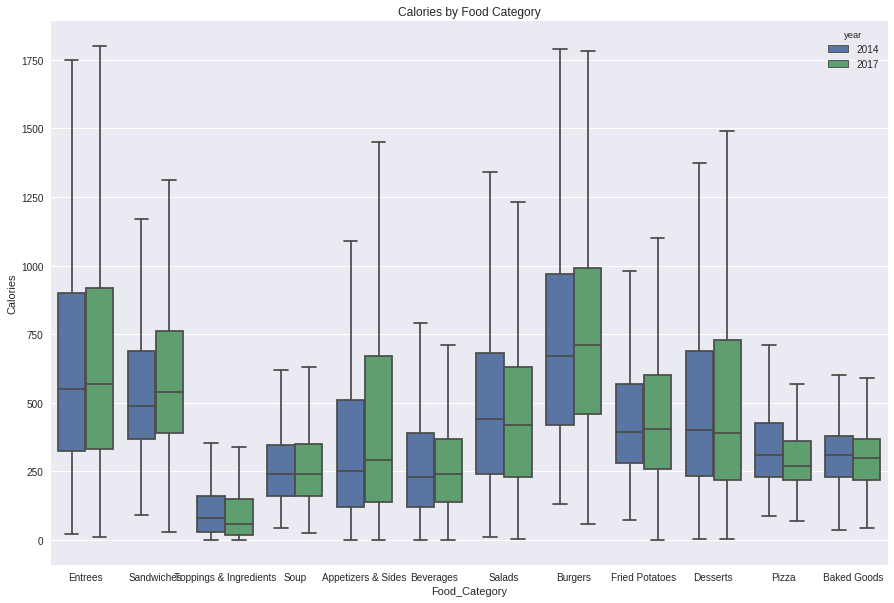

In [13]:
fig, ax = plt.subplots(sharex=True,sharey=True,figsize=(15,10))
plt.title('Calories by Food Category')
ax = sns.boxplot(x="Food_Category", y="Calories", hue="year", data=vertical_stack, showfliers = False)  
plt.show()

In [14]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') 
                                   for _ in range(6)]))
    return colors

### What can we infer from the box plot:
1. They look almost the same
2. Average(Median), spread(IQR NOT Range!)

Note:*2018 data would be much better comparison see the effect of calorie variation*

## Data Explore on 2017!

In [15]:
#how much does each restaurant contribute in the overall 2017 dataset?
label_percent = []
total_items = sum(df_2017.Restaurant.value_counts())
for each_value in df_2017.Restaurant.value_counts():
    label_percent.append(100*each_value / total_items)

In [16]:
trace = go.Bar(
            x = df_2017.Restaurant.value_counts().values[::-1],
            y = [i for i in df_2017.Restaurant.value_counts().index][::-1],#reversed
            orientation = 'h', text= label_percent[::-1],
            marker = dict(color = random_colours(94))#number of restuarants is 94
    )
layout = go.Layout(title = "Restaurant(Y axis) vs Calories(X axis)",
                   titlefont = dict(size = 25),
                   xaxis = dict(title='Count of Items'),
                   width = 800, height = 1000,  
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   margin=dict(l=120),
                  font=dict(size=7))
data = [trace]
fig = dict(data=data, layout =layout)
iplot(fig, filename="cooking_horz_bar")

###### High calorie restaurants

In [17]:
#Top 10
df_new = df_2017.groupby('Restaurant').Calories.mean().reset_index()
df_new.sort_values('Calories', ascending = False).head(10)

,Restaurant,Calories
50,Little Caesars,1346.428571
38,Hooters,1081.875000
77,Sbarro,1076.140351
31,Famous Dave's,1003.376855
58,O'Charley's,909.473684
74,Romano's Macaroni Grill,836.320000
92,Yard House,775.042017
46,Joe's Crab Shack,757.593985
34,Friendly's,725.766784
44,Jersey Mike's Subs,618.183442


# Data Modeling

Technique for measuring similarity:

## What is an N-gram?
Contiguous sequence of n words


![title](data/nlp.png)

More about [NLP Ngrams](https://en.wikipedia.org/wiki/N-gram)

# Example


In this case we will have the bigrams to find a similar items
## Restaurant is *Starbucks*

## Identifying the the product that gets  affected through Bigrams



In [18]:
#subset to our dataframe choice!
df_ourchoice = df_2017[(df_2017['Restaurant'] == 'Starbucks')]

In [19]:
#Tuple with itemname and menu id
item_name_id = list(zip(df_ourchoice[' Item_Name_2017'], df_ourchoice['Menu_Item_ID']))
item_name_id[0]

('Devils Food Doughnut', 101541)

In [20]:
def get_bigrams_to_menu_id(item_name_id ):
    """
    Collects item name and its respective menu id from the input tuple and output a 
    list of bigram occurances with their menu id.
    
    Args:
        item_name_id - list of tuples with item name and its menu id
    
    Returns:
        bigram_dict - dictionary with bigram name as the key and list of IDs as value
    """
    bigram_dict = defaultdict(list)
    text = []
    for item_name, idx in item_name_id:
        text.append(item_name)
        bigrms = list(nltk.bigrams(item_name.split()))
        for bigrm in bigrms:
            joined_bigram = " ".join(bigrm)
            bigram_dict[joined_bigram].append(idx)
    return bigram_dict

In [21]:
bigram_dict = get_bigrams_to_menu_id(item_name_id)
bigram_dict['Caramel Macchiato']
# bigram_dict[0]

[101590,
 101591,
 101592,
 101593,
 101678,
 101679,
 101680,
 158542,
 158543,
 158544,
 158545,
 158700,
 158701,
 158702,
 159722,
 159736,
 159754,
 159761,
 159775,
 159801,
 159829,
 159842,
 159874,
 159893,
 159897,
 159964,
 160017,
 160049,
 160073,
 23454,
 23463,
 33215,
 33216,
 33217,
 33218,
 33219,
 33220,
 33221,
 33545,
 33546,
 33547,
 33548,
 33549,
 33550,
 33551,
 33552,
 33613,
 33614,
 33615,
 33616,
 33617,
 33618,
 33619,
 33620,
 33621,
 33622,
 33623]

In [22]:
def get_menu_choice_and_calorie(user_choice):
    """
    Builds a list based on the user_choice input from user and returns
    a list of food item options for the user.
    
    
    Args:
        user_choice - a string bigram input from user.
    
    Returns: 
        returns a list of tuples with item name and 
        calorie content value of that item.
    """
    choice_list = []
    item_list = []
    calorie_list = []

    for idx in bigram_dict[user_choice]:
        name = df_ourchoice[df_ourchoice['Menu_Item_ID'] == idx][' Item_Name_2017'].tolist()
        cal = df_ourchoice[df_ourchoice['Menu_Item_ID'] == idx]['Calories']

        item_list.append(name[0])
        calorie_list.append(float(cal))

    return list(zip(item_list,calorie_list))

In [23]:
help(get_menu_choice_and_calorie)

Help on function get_menu_choice_and_calorie in module __main__:

get_menu_choice_and_calorie(user_choice)
    Builds a list based on the user_choice input from user and returns
    a list of food item options for the user.
    
    
    Args:
        user_choice - a string bigram input from user.
    
    Returns: 
        returns a list of tuples with item name and 
        calorie content value of that item.



# I want to have a *Mocha Frappuccino* @ *Starbucks*

*Mocha Frappuccino* is a bigram

In [24]:
choice_list = get_menu_choice_and_calorie('Mocha Frappuccino')

shuffle(choice_list)

In [25]:
len(choice_list)

194

In [26]:
choice_list

[('Peppermint Mocha Frappuccino Blended Creme w/ Coconut Milk, Venti, 24 oz',
  320.0),
 ('Peppermint Mocha Frappuccino Blended Beverage w/ 2% Milk, Tall, 12 oz',
  190.0),
 ('Peppermint Mocha Frappuccino Blended Beverage w/ Whole Milk, Grande, 16 oz',
  310.0),
 ('White Chocolate Mocha Frappuccino Blended Coffee w/ Almond Milk, Tall, 12 oz',
  190.0),
 ('Peppermint Mocha Frappuccino Blended Beverage w/ Whole Milk & Whipped Cream, Tall',
  330.0),
 ('Mocha Frappuccino Blended Coffee w/ Soy Milk, Tall', 200.0),
 ('Peppermint White Chocolate Mocha Frappuccino Blended Beverage w/ Almond Milk & Whipped Cream, Venti Iced',
  530.0),
 ('Peppermint White Chocolate Mocha Frappuccino Blended Beverage w/ USA Soy Milk & Whipped Cream, 16.00',
  480.0),
 ('Mocha Frappuccino Blended Coffee w/ Coconut & Whipped Cream, Tall', 270.0),
 ('White Chocolate Mocha Frappuccino Blended Coffee w/ 2% Milk, Venti Iced',
  400.0),
 ('White Chocolate Mocha Frappuccino Blended Coffee w/ 2% Milk, Grande',
  290.0),

# Top 5 recommendations:

In [27]:
sorted(choice_list, key=lambda x: x[1])[:5]

[('Peppermint Mocha Frappuccino Blended Creme w/ Almond Milk, Tall', 160.0),
 ('Peppermint Mocha Frappuccino Blended Creme w/ Nonfat Milk, Tall, 12 oz',
  170.0),
 ('Mocha Frappuccino Blended Coffee w/ Almond Milk, Tall, 12 oz', 180.0),
 ('Peppermint Mocha Frappuccino Blended Beverage w/ 2% Milk, Tall, 12 oz',
  190.0),
 ('White Chocolate Mocha Frappuccino Blended Coffee w/ Almond Milk, Tall, 12 oz',
  190.0)]

## Resources
1. [Comparison of pandas with SQL](https://pandas.pydata.org/pandas-docs/version/0.22.0/comparison_with_sql.html)
2. [Data visualization - Plotly](https://plot.ly/python/)